#Laborarotio 1

Sección A


In [6]:
import numpy as np
import matplotlib.pyplot as plt
!pip install wfdb #instalar el colab
import wfdb

uploaded = files.upload ()


Saving 43416857.dat to 43416857 (1).dat
Saving 43416857.hea to 43416857 (1).hea


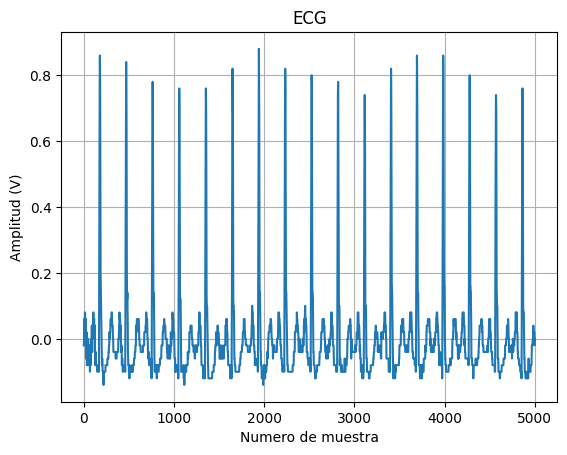

In [23]:
signals, fields = wfdb.rdsamp("/content/43416857")
ecg_1 = signals[:, 1]
signals
plt.plot (ecg_1)
plt.ylabel("Amplitud (V)")
plt.xlabel("Numero de muestra")
plt.title("ECG")
plt.grid()
plt.show()


In [24]:
print(f"Datos con funciones")

#media
media=np.mean(ecg_1)
print (f"Media: {media} ")

#mediana
mediana=np.median(ecg_1)
print (f"Mediana: {mediana} ")

#desviación estandar
desviacion_muestra=np.std(ecg_1, ddof=1)
print (f"Desviacion estandar: {desviacion_muestra} ")

#coeficiente de variacion
coef_var = (desviacion_muestra / media) * 100
print(f"Coeficiente de variacion: {coef_var:.2f}%")

Datos con funciones
Media: -0.000895 
Mediana: -0.04 
Desviacion estandar: 0.14938934838361834 
Coeficiente de variacion: -16691.55%


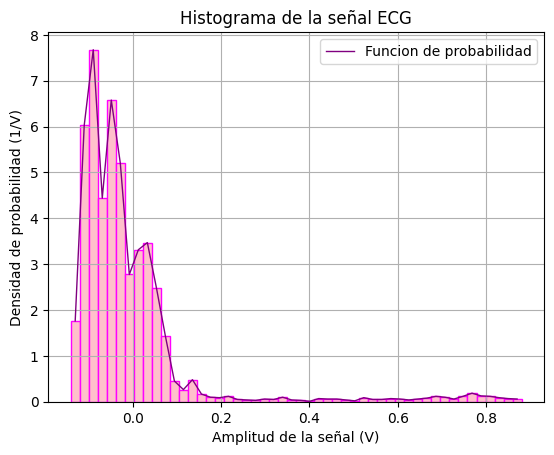

Curtosis: 230.47645529278154


In [25]:
cuentas, bins, _=plt.hist(ecg_1, bins=50, color='pink', edgecolor='magenta', density=True)

#funcion de probabilidad
centros=0.5*(bins[1:]+ bins[:-1])
plt.plot(centros, cuentas, color='purple', linewidth=1, label="Funcion de probabilidad")

#grafica
plt.title("Histograma de la señal ECG")
plt.ylabel("Densidad de probabilidad (1/V)")
plt.xlabel("Amplitud de la señal (V)")
plt.grid()
plt.legend()
plt.show()

#curtosis
n=len(ecg_1)
curtosis=np.sum(((ecg-media)/desviacion_muestra)**4)/n
print(f"Curtosis: {curtosis}")

In [27]:
print(f"Datos sin funciones")

#media
suma = 0
n = len(ecg_1)
for valor in ecg_1:
    suma += valor
media = suma / n
print(f"Media: {media}")

#mediana
datos_ordenados = list(ecg_1)
for i in range(n):
    for j in range(i+1, n):
        if datos_ordenados[i] > datos_ordenados[j]:
            datos_ordenados[i], datos_ordenados[j] = datos_ordenados[j], datos_ordenados[i]
if n % 2 == 0:
    mediana = (datos_ordenados[n//2 - 1] + datos_ordenados[n//2]) / 2
else:
    mediana = datos_ordenados[n//2]
print(f"Mediana: {mediana}")

#desviacion estandar
suma_cuadrados = 0
for valor in ecg_1:
    suma_cuadrados += (valor - media) ** 2
varianza = suma_cuadrados / n
desviacion = varianza ** 0.5
print (f"Desviacion estandar: {desviacion} ")

#coeficiente de variacion
coef_variacion = (desviacion / media) * 100
print(f"Coeficiente de variacion: {coef_variacion:.2f}%")

#curtosis
suma_cuarta = 0
for valor in ecg_1:
    suma_cuarta += (valor - media) ** 4
curtosis = (suma_cuarta / n) / (varianza ** 2) - 3
print(f"Curtosis: {curtosis}")

Datos sin funciones
Media: -0.0008949999999999886
Mediana: -0.04
Desviacion estandar: 0.14937440870175706 
Coeficiente de variacion: -16689.88%
Curtosis: 15.227457816831134


In [5]:
from google.colab import files
uploaded=files.upload()

Saving 43416857.dat to 43416857.dat
Saving 43416857.hea to 43416857.hea


Sección B


In [13]:
from google.colab import files
import csv

uploaded = files.upload()

nombre_archivo = next(iter(uploaded))


Saving lectura_adckathaaainetnto1000señalcorrec.csv to lectura_adckathaaainetnto1000señalcorrec.csv


In [14]:
with open(nombre_archivo, newline='', encoding='utf-8') as f:
    lector = csv.reader(f)
    datos_ecg = list(lector)

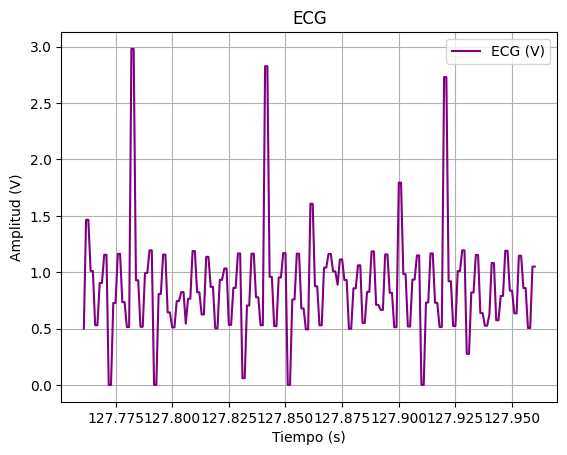

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#plt.plot(tiempo, amplitud)
#plt.ylabel("Voltaje (V)")
#plt.xlabel("Tiempo (s)")
#plt.title("ECG")
#plt.grid()
#plt.show()

#datos originalmente en adc, conversion a voltios
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

tiempo = [float(fila[0]) for fila in datos_ecg[1:]]
amplitud_adc = [float(fila[1]) for fila in datos_ecg[1:]]
amplitud_v = [a * VREF / FULL_SCALE for a in amplitud_adc] #conversion

t_inicio = 127.761
t_fin = 127.96
tiempo_filtrado = []
amplitud_filtrada_v = []

for t, a_v in zip(tiempo, amplitud_v):
    if t_inicio <= t <= t_fin:
        tiempo_filtrado.append(t)
        amplitud_filtrada_v.append(a_v)

#grafica
plt.plot(tiempo_filtrado, amplitud_filtrada_v, color='purple', label='ECG (V)')
plt.ylabel("Amplitud (V)")
plt.xlabel("Tiempo (s)")
plt.title("ECG")
plt.legend()
plt.grid()
plt.show()

In [29]:
#datos para conversion
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

amplitud_np = np.array([float(fila[1]) for fila in datos_ecg[1:]])
amplitud_v = amplitud_np * VREF / FULL_SCALE #conversion

#media
media=np.mean(amplitud_v)
print (f"Media: {media} ")

#mediana
mediana=np.median(amplitud_v)
print (f"Mediana: {mediana} ")

#desviación estandar
desviacion_muestra=np.std(amplitud_v, ddof=1)
print (f"Desviacion estandar: {desviacion_muestra} ")

#coeficiente de variacion
coef_var = (desviacion_muestra / media) * 100
print(f"Coeficiente de variacion: {coef_var:.2f}%")


Media: 0.8804996336996337 
Mediana: 0.8356776556776556 
Desviacion estandar: 0.4758191679603716 
Coeficiente de variacion: 54.04%


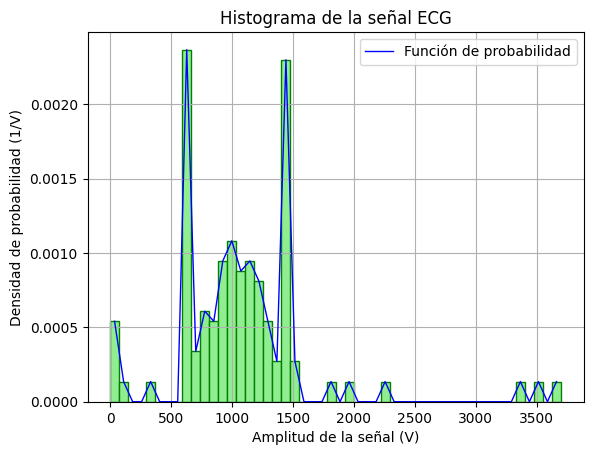

Curtosis: 9.784939579218962


In [30]:
#datos para conversion
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

valores_ecg_adc = np.array([float(fila[1]) for fila in datos_ecg[1:]])
valores_ecg_v = valores_ecg_adc * VREF / FULL_SCALE #conversion
cuentas, bins, _ = plt.hist(valores_ecg, bins=50, color='lightgreen', edgecolor='green', density=True)

#funcion de probabilidad
centros = 0.5 * (bins[1:] + bins[:-1])
plt.plot(centros, cuentas, color='blue', linewidth=1, label="Función de probabilidad")

#grafica
plt.title("Histograma de la señal ECG")
plt.ylabel("Densidad de probabilidad (1/V)")
plt.xlabel("Amplitud de la señal (V)")
plt.grid()
plt.legend()
plt.show()

#curtosis
media = np.mean(valores_ecg_v)
desviacion_muestra = np.std(valores_ecg_v, ddof=1)
n = len(valores_ecg_v)
curtosis = np.sum(((valores_ecg_v - media) / desviacion_muestra) ** 4) / n
print(f"Curtosis: {curtosis}")

In [31]:
#datos para conversion
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

ecg_adc = [float(fila[1]) for fila in datos_ecg[1:]]
ecg = [valor * VREF / FULL_SCALE for valor in ecg_adc] #conversion

print("Datos sin funciones")

#media
suma = 0
n = len(ecg)
for valor in ecg:
    suma += valor
media = suma / n
print(f"Media: {media}")

#mediana
datos_ordenados = list(ecg)
for i in range(n):
    for j in range(i+1, n):
        if datos_ordenados[i] > datos_ordenados[j]:
            datos_ordenados[i], datos_ordenados[j] = datos_ordenados[j], datos_ordenados[i]
if n % 2 == 0:
    mediana = (datos_ordenados[n//2 - 1] + datos_ordenados[n//2]) / 2
else:
    mediana = datos_ordenados[n//2]
print(f"Mediana: {mediana}")

#desviacion estandar
suma_cuadrados = 0
for valor in ecg:
    suma_cuadrados += (valor - media) ** 2
varianza = suma_cuadrados / n
desviacion = varianza ** 0.5
print (f"Desviacion estandar: {desviacion} ")

#coeficiente de variacion
coef_variacion = (desviacion / media) * 100
print(f"Coeficiente de variacion: {coef_variacion:.2f}%")

#curtosis
suma_cuarta = 0
for valor in ecg:
    suma_cuarta += (valor - media) ** 4
curtosis = (suma_cuarta / n) / (varianza ** 2) - 3
print(f"Curtosis: {curtosis}")

Datos sin funciones
Media: 0.8804996336996334
Mediana: 0.8356776556776556
Desviacion estandar: 0.4746281293765761 
Coeficiente de variacion: 53.90%
Curtosis: 6.8835277687118595


Sección C
